In [1]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='W')

In [3]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name='b')

In [4]:
def conv2d(X, W):
    return tf.nn.conv2d(X, W, strides=[1, 1, 1, 1], padding='SAME')

In [5]:
def max_pool_2x2(X):
    return tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding=('SAME'))

In [6]:
with tf.name_scope('Input_Layer'):
    X = tf.placeholder('float', shape=[None, 784], name='X')
    X_image = tf.reshape(X, [-1, 28, 28, 1])

In [7]:
with tf.name_scope('C1_conv'):
    W1 = weight([5, 5, 1, 16])
    b1 = bias([16])
    Conv1 = conv2d(X_image, W1) +b1
    C1_Conv = tf.nn.relu(Conv1)

In [8]:
with tf.name_scope('C1_pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

In [9]:
with tf.name_scope('C2_conv'):
    W2 = weight([5, 5, 16, 36])
    b2 = bias([36])
    Conv2 = conv2d(C1_Pool, W2) + b2
    C2_Conv = tf.nn.relu(Conv2)

In [10]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv)

In [11]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])

In [12]:
with tf.name_scope('D_Hidden_Layer'):
    W3 = weight([1764, 128])
    b3 = bias([128])
    D_Hidden = tf.nn.relu(tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout = tf.nn.dropout(D_Hidden,keep_prob=0.8)

In [13]:
with tf.name_scope('Output_Layer'):
    W4 = weight([128, 10])
    b4 = bias([10])
    y_predict = tf.nn.softmax(tf.matmul(D_Hidden_Dropout, W4)+b4)


In [14]:
with tf.name_scope('optimizer'):
    y_label = tf.placeholder('float', [None,10], name='y_label')
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2
                               (logits=y_predict, labels=y_label))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

In [15]:
with tf.name_scope('evaluate_model'):
    correct_prediction = tf.equal(tf.argmax(y_predict,1),tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [16]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples / batchSize)
loss_list = []; epoch_list=[];accuracy_list=[]
from time import time
startTime = time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={X: batch_x, y_label:batch_y})
    loss, acc = sess.run([loss_function, accuracy], feed_dict={X: mnist.validation.images,
                                                               y_label: mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch:', '%02d' % (epoch+1), 'Loss=', '{:.9f}'.format(loss), 'Accuracy', acc)

duration = time()-startTime
print('Train Finished takes:', duration)

Train Epoch: 01 Loss= 1.672218800 Accuracy 0.8102
Train Epoch: 02 Loss= 1.614598870 Accuracy 0.8534
Train Epoch: 03 Loss= 1.597628474 Accuracy 0.8688
Train Epoch: 04 Loss= 1.521170259 Accuracy 0.9488
Train Epoch: 05 Loss= 1.505951524 Accuracy 0.9612
Train Epoch: 06 Loss= 1.499701977 Accuracy 0.966
Train Epoch: 07 Loss= 1.495430708 Accuracy 0.9706
Train Epoch: 08 Loss= 1.493870139 Accuracy 0.97
Train Epoch: 09 Loss= 1.490925074 Accuracy 0.9736
Train Epoch: 10 Loss= 1.489347577 Accuracy 0.9742
Train Epoch: 11 Loss= 1.486832142 Accuracy 0.977
Train Epoch: 12 Loss= 1.485451937 Accuracy 0.978
Train Epoch: 13 Loss= 1.484215975 Accuracy 0.9792
Train Epoch: 14 Loss= 1.484297872 Accuracy 0.9798
Train Epoch: 15 Loss= 1.484654546 Accuracy 0.9778
Train Finished takes: 58.88113236427307


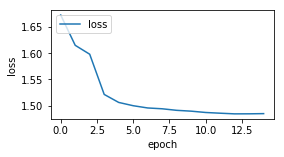

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

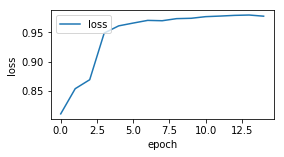

In [19]:
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, accuracy_list, label='accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

In [20]:
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y_label: mnist.test.labels}))

Accuracy: 0.9829


In [21]:
prediction_result = sess.run(tf.argmax(y_predict,1), feed_dict={X:mnist.test.images})

In [22]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [23]:
import numpy as np
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(np.reshape(images[idx],(28,28),), cmap='binary')
        title = 'label=' + str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+= ',predict=' + str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([])#hide the ticks
        ax.set_yticks([])
        idx+=1
    plt.show()

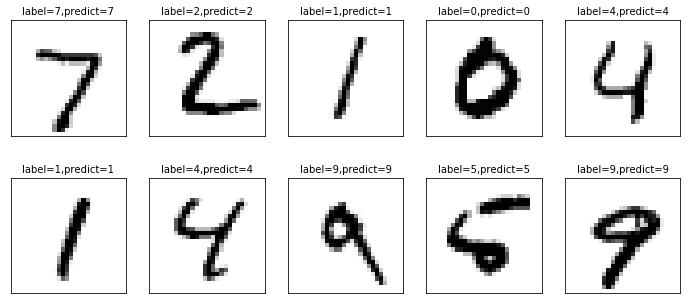

In [24]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)

In [25]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/CNN', sess.graph)